In [17]:
# Template for 1D model fitting with Stan
# Example: fitting a straight line in x and y with Gaussian priors
# Zero data points allowed (= model prediction from theory)
import numpy as np
import matplotlib.pyplot as plt
import stan_utility
import pystan
import pickle
import sys
plt.style.use('thomas')

In [25]:
# Create data
# True parameters
a = 1
b = 1

# Gaussian priors on a and b
mu_a = a
sigma_a = 2
mu_b = b
sigma_b = 2

seed = 1234
np.random.seed(seed=seed)

# Build data set with uncertainties
N_obs = 10
x     = np.linspace(0,10,N_obs)
if len(x) > 1:
    x_err = (x[1] - x[0])/2.
y     = a + b*x
y_err = np.repeat(5,N_obs)
yp = y + np.random.randn(N_obs)*y_err

In [26]:
# where to evaluate the model for posterior prediction
N_model = 100
x_model = np.linspace(-2.5,12.5,N_model)

In [27]:
# dictionary for data set and prior
data2 = dict(N = N_obs,
             x = x,
             y = yp,
             y_err = y_err,
             N_model = N_model,
             x_model = x_model,
             mu_a = mu_a,
             sigma_a = sigma_a,
             mu_b = mu_b,
             sigma_b = sigma_b)

In [28]:
## compile model (if not yet compiled):
model = pystan.StanModel('fit_straight_line.stan')

## save it to the file 'filename.pkl' for later use
with open('fit_straight_line_wpriors.pkl', 'wb') as f:
    pickle.dump(model, f)
    
#read filename.pkl (if already compiled)
model = pickle.load(open('fit_straight_line_wpriors.pkl', 'rb'))

In [29]:
# fit the model
fit = model.sampling(data=data2,verbose=True,chains=1,iter=10000)

In [30]:
# extract information
chain = fit.extract()
print(fit.stansummary(['a','b']))


Inference for Stan model: anon_model_12e7c7f88af118f91d905a215ff1a2ee.
1 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=5000.

    mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a   1.62    0.04   1.61  -1.52   0.51   1.59   2.72   4.81   1525    1.0
b   0.65  8.8e-3   0.34  -0.02   0.42   0.65   0.88   1.32   1522    1.0

Samples were drawn using NUTS at Sun May 12 18:51:42 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


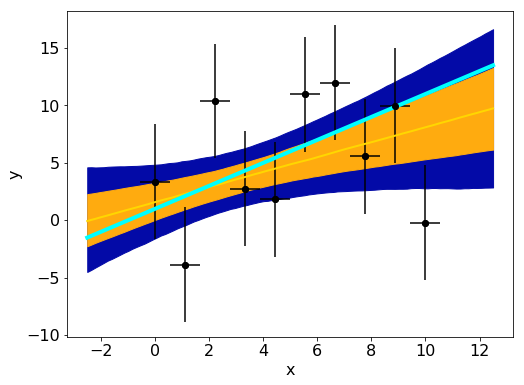

In [31]:
# make some plots of interest

plt.plot(x,yp,'ko')
plt.errorbar(x,yp,yerr=y_err,xerr=x_err,fmt='ko')

level = 95.4
plt.fill_between(x_model,
                np.percentile(chain['straight_line'], 50 - 0.5*level, axis=0 ),
                np.percentile(chain['straight_line'], 50 + 0.5*level, axis=0 ),
                color='xkcd:cobalt blue',alpha=1.0)

level = 68.3
plt.fill_between(x_model,
                np.percentile(chain['straight_line'], 50 - 0.5*level, axis=0 ),
                np.percentile(chain['straight_line'], 50 + 0.5*level, axis=0 ),
                color='xkcd:yellowish orange',alpha=1)

fit_model = np.median(chain['straight_line'],axis=0)
plt.plot(x_model,fit_model,linewidth=2,color='gold')
    
plt.xlabel('x')
plt.ylabel('y')

plt.plot(x_model,a+x_model*b,color='cyan',linewidth=4)